In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

**Chapter 1**

<h2>Graphical Exploratory Data Analysis

<h3> Introduction to EDA

<h3> Plotting a Histogram

In [16]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/8fb59b9a99957c3b9b1c82b623aea54d8ccbcd9f/2008_all_states.csv')

In [17]:
df.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


(array([ 25., 210., 518., 718., 734., 532., 267.,  97.,  39.,  13.]),
 array([ 5.03, 13.87, 22.71, 31.55, 40.39, 49.23, 58.07, 66.91, 75.75,
        84.59, 93.43]),
 <a list of 10 Patch objects>)

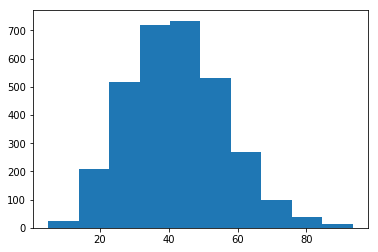

In [18]:
plt.hist(df['dem_share'])

In [14]:
bin_edges = [0,10,20,30,40,50,60,70,80,90,100]

(array([  5., 138., 496., 784., 846., 547., 231.,  81.,  24.,   1.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

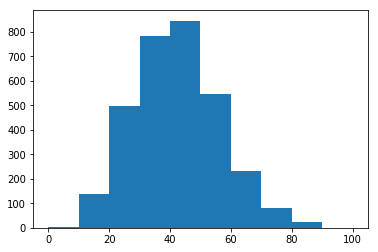

In [19]:
plt.hist(df['dem_share'] , bins = bin_edges)

**Setting seaborn styling**

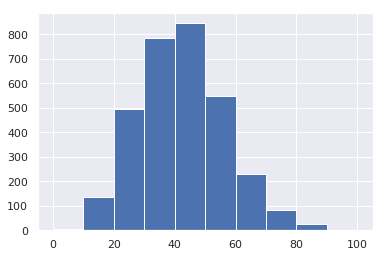

In [20]:
sns.set()
plt.hist(df['dem_share'] , bins = bin_edges)
plt.show()

<h3>Plotting all your data

<h3> Bee Swarm Plots

In histogram we are sweeping data to bins hence it loses the actual value , so we go for bee swarm plots

In [23]:
df_swing = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/e079fddb581197780e1a7b7af2aeeff7242535f0/2008_swing_states.csv')

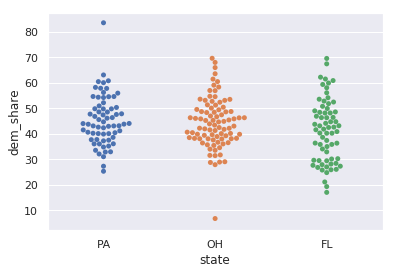

In [24]:
sns.swarmplot(x = 'state' , y = 'dem_share' , data = df_swing)

<h2>ECDF (Emperical Cummulative Distribution Function)

In [25]:
x = np.sort(df_swing['dem_share'])

In [26]:
y = np.arange(1 , len(x) + 1) / len(x)

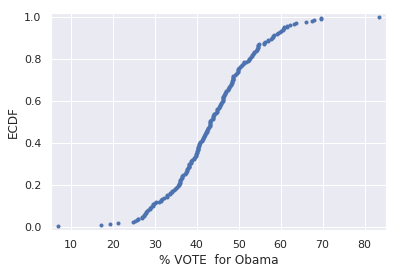

In [27]:
plt.plot(x , y , marker = '.' , linestyle = 'none')
plt.xlabel('% VOTE  for Obama')
plt.ylabel('ECDF')
plt.margins(0.02)#Keeps data off the plot edges
plt.show()

20% of counties in swing states had a 36% or less of ppl voting for Obama

70% of counties in swing states had 50% or less of it's people votr for obama

**Chapter 2**

<h2> Introduction to Summary Statistics

Sometimes we wanna summarize the whole data in one or two digits

**Mean**

In [31]:
np.mean(df_swing['dem_share'])

43.76441441441444

Mean is the sum of all data divided by the number n of data points

**Median**

In [32]:
np.median(df_swing['dem_share'])

43.185

Median is Immune to extreme data (outliers)

**Percentile**

In [33]:
np.percentile(df_swing['dem_share'] , [25 , 50 , 75])

array([37.3025, 43.185 , 49.925 ])

A median is the special name for the 50th Percentile

25th Percentile is greater than the **25% of the sorted data** and so on for the other percentiles